You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix

train_df = pd.read_csv("mushroom_train.csv", delimiter = ";")
test_df = pd.read_csv("mushroom_test.csv", delimiter = ";")
train_df = train_df.sample(frac = 1,random_state = 42)
test_df = test_df.sample(frac = 1,random_state = 42)
 #note delimitter for this file is semi-colon (;) not comma

In [2]:
def report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label):
    print(clf)
    clf.fit(train_data_tf,train_label)
    prediction = clf.predict(test_data_tf)
    accuracy_tf = metrics.accuracy_score(test_label,prediction)
    precision_tf = metrics.precision_score(test_label,prediction)
    recall_tf = metrics.recall_score(test_label,prediction)
    f1_tf = metrics.f1_score(test_label,prediction)
    confusion_matrix_tf = metrics.confusion_matrix(test_label, prediction)
    print("Accuracy with transformed data: ",accuracy_tf)
    print("Precision with transformed data: ",precision_tf)
    print("Recall with transformed data: ",recall_tf)
    print("F1 score with transformed data: ",f1_tf)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =confusion_matrix_tf,display_labels = ["poisonous","edible"] )
    cm_display.plot()
    metrics.plot_roc_curve(clf,test_data_tf ,test_label)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()

In [3]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
21982,e,3.91,x,NaN,y,f,a,c,y,4.84,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
12387,e,1.58,x,s,y,f,d,NaN,w,6.05,...,NaN,t,y,NaN,NaN,f,f,NaN,h,a
16701,e,7.56,f,t,o,f,s,NaN,y,8.21,...,NaN,i,o,NaN,NaN,f,f,NaN,d,a
28593,p,6.53,s,d,e,t,d,c,y,5.33,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
44850,p,3.83,b,y,n,f,NaN,c,g,5.60,...,s,s,w,NaN,NaN,f,f,NaN,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,p,2.37,x,g,n,f,a,NaN,p,7.45,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
44732,p,8.00,b,y,w,f,NaN,NaN,p,12.99,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
38158,p,7.68,x,e,n,f,a,NaN,n,11.95,...,s,NaN,n,NaN,n,f,f,NaN,h,a
860,p,12.28,f,NaN,n,f,e,NaN,w,10.79,...,NaN,NaN,w,u,w,t,g,NaN,d,u


In [4]:
test_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
33,p,2.88,b,NaN,g,f,a,NaN,n,9.26,...,NaN,NaN,n,NaN,w,f,f,k,g,a
7233,e,3.22,s,NaN,y,f,f,f,f,6.36,...,NaN,NaN,o,NaN,NaN,f,f,NaN,d,a
4582,e,6.46,x,NaN,g,t,p,NaN,g,12.58,...,NaN,y,w,NaN,NaN,f,f,NaN,d,a
5981,p,9.35,s,t,n,t,d,c,n,5.63,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,a
3272,p,9.54,x,NaN,n,f,p,NaN,p,11.09,...,c,NaN,n,NaN,NaN,f,f,p,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,p,10.67,x,t,r,t,d,c,n,6.01,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,a
5191,e,9.43,x,h,n,t,p,NaN,y,8.09,...,NaN,NaN,n,NaN,w,t,p,NaN,d,a
5390,e,8.98,x,h,n,f,p,d,y,7.42,...,NaN,s,n,NaN,NaN,f,f,NaN,d,u
860,e,17.05,x,t,n,f,p,NaN,w,19.89,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a


# 2. Splitting Data into Features and Labels

In [5]:
# Only keep features that shroomster can detect!
train_features = train_df.drop("class",axis = 1)
train_labels = train_df["class"]
test_features = test_df.drop("class",axis = 1)
test_labels = test_df["class"]

# 3. Data Exploration and Visualization

In [6]:
# Hint: We have done this in both project 1 & 2

%matplotlib inline
import matplotlib.pyplot as plt #plotting package
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
21982,e,3.91,x,NaN,y,f,a,c,y,4.84,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
12387,e,1.58,x,s,y,f,d,NaN,w,6.05,...,NaN,t,y,NaN,NaN,f,f,NaN,h,a
16701,e,7.56,f,t,o,f,s,NaN,y,8.21,...,NaN,i,o,NaN,NaN,f,f,NaN,d,a
28593,p,6.53,s,d,e,t,d,c,y,5.33,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
44850,p,3.83,b,y,n,f,NaN,c,g,5.60,...,s,s,w,NaN,NaN,f,f,NaN,d,a


In [7]:
train_df.iloc[1]

class                      e
cap-diameter            1.58
cap-shape                  x
cap-surface                s
cap-color                  y
does-bruise-or-bleed       f
gill-attachment            d
gill-spacing             NaN
gill-color                 w
stem-height             6.05
stem-width              2.25
stem-root                NaN
stem-surface               t
stem-color                 y
veil-type                NaN
veil-color               NaN
has-ring                   f
ring-type                  f
spore-print-color        NaN
habitat                    h
season                     a
Name: 12387, dtype: object

In [8]:
train_df.describe()

,cap-diameter,stem-height,stem-width
count,50213.000000,50213.000000,50213.000000
mean,6.245186,6.600561,10.763191
std,4.542552,3.221714,7.744992
min,0.380000,1.200000,0.520000
25%,3.290000,4.680000,4.720000
50%,5.540000,5.900000,9.130000
75%,8.100000,7.600000,15.210000
max,58.890000,33.920000,58.950000


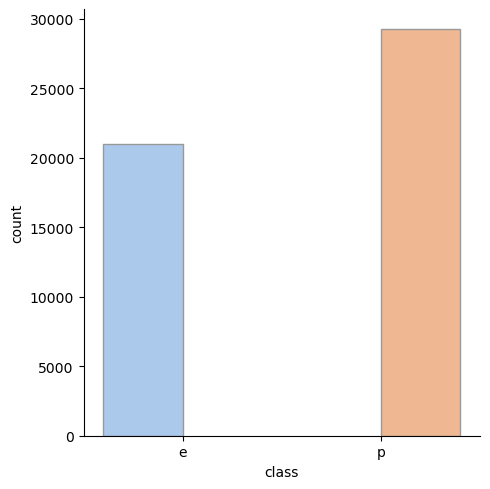

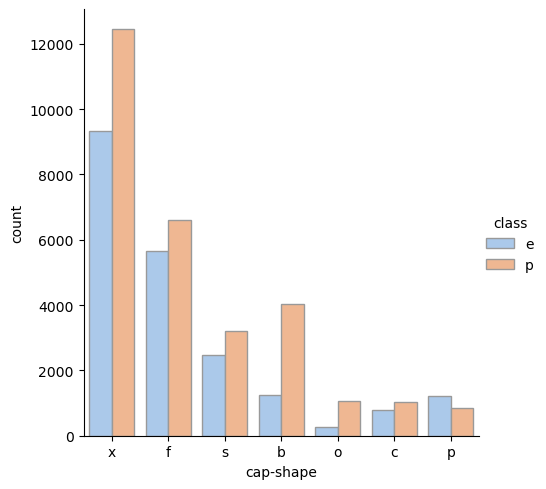

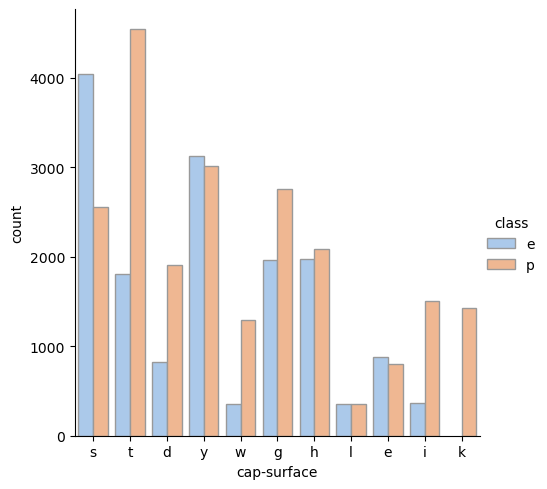

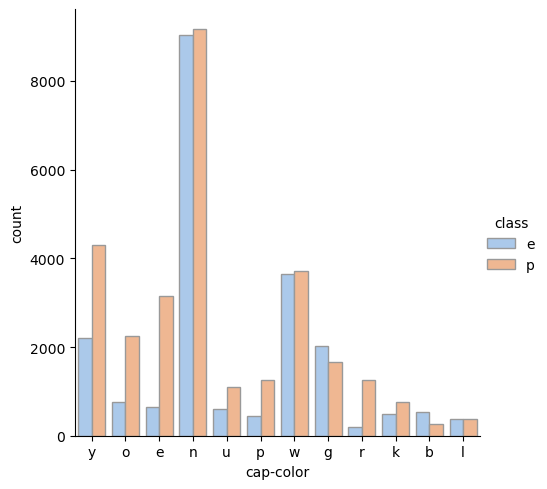

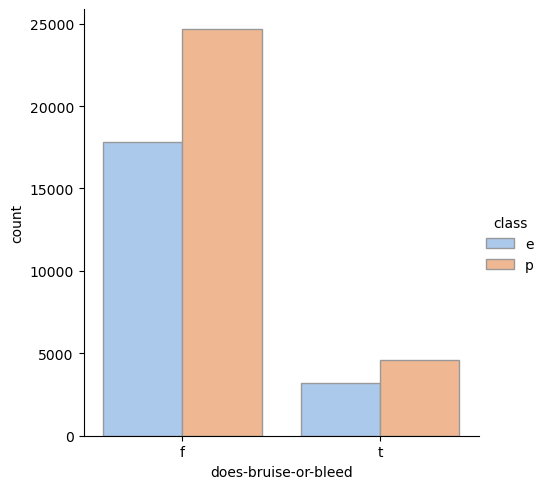

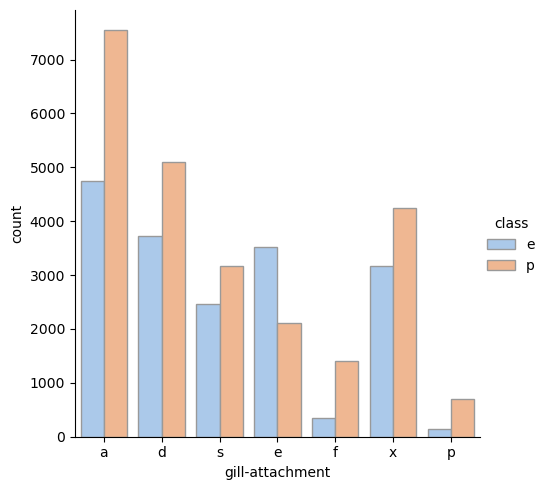

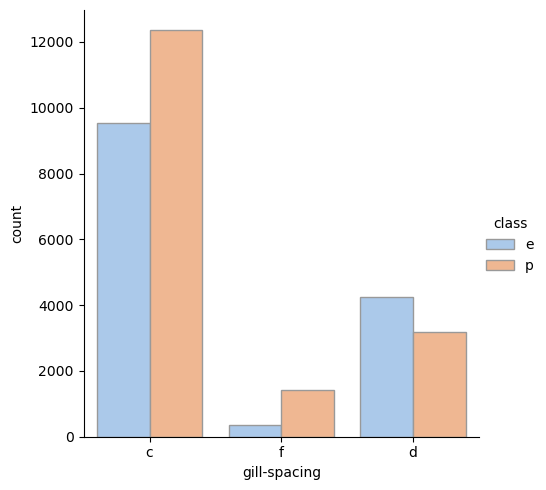

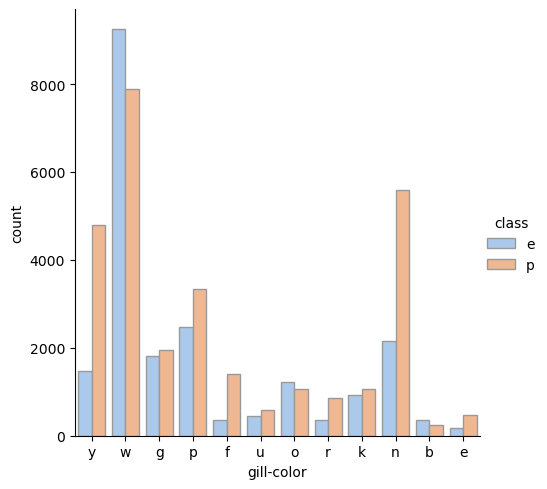

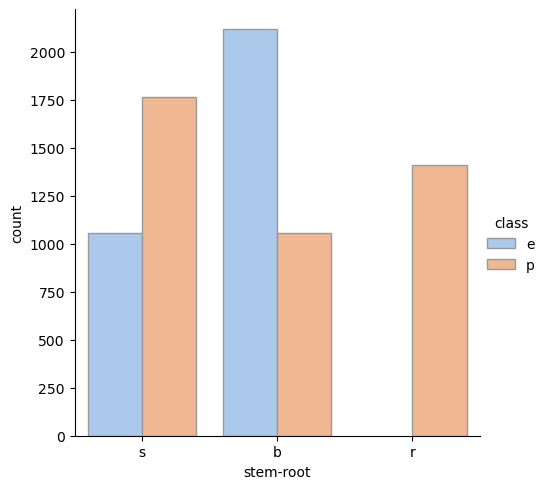

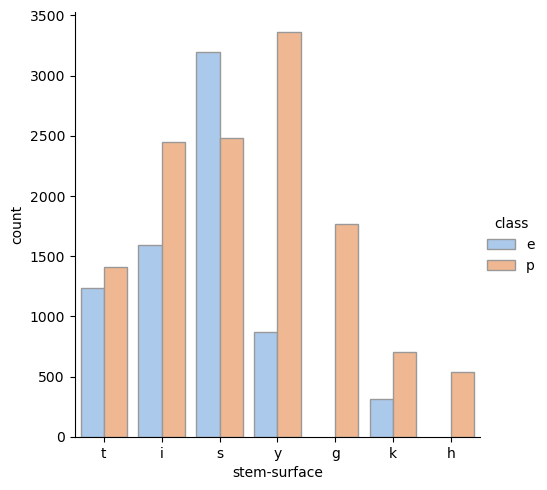

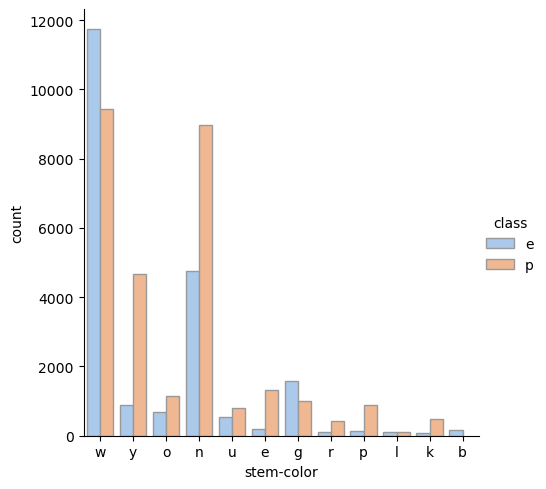

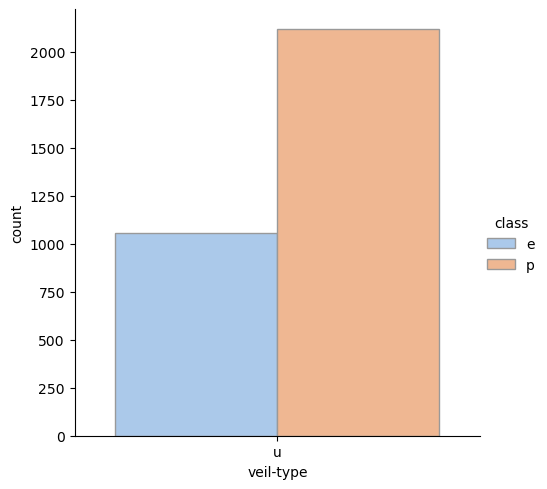

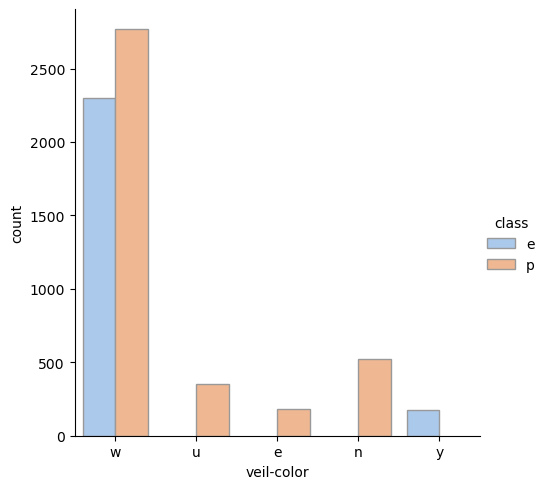

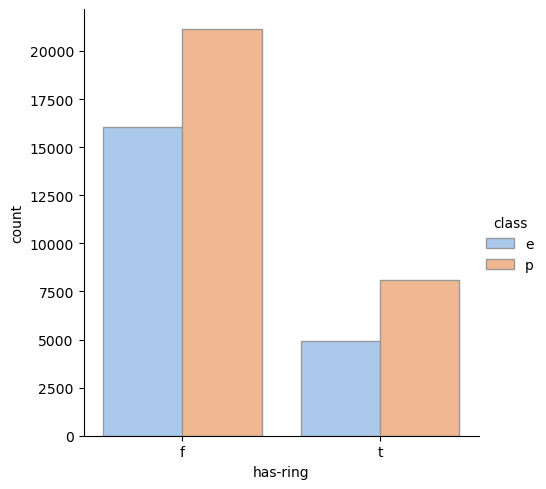

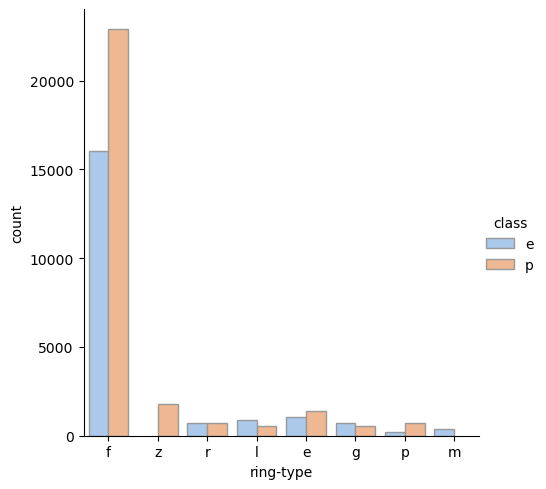

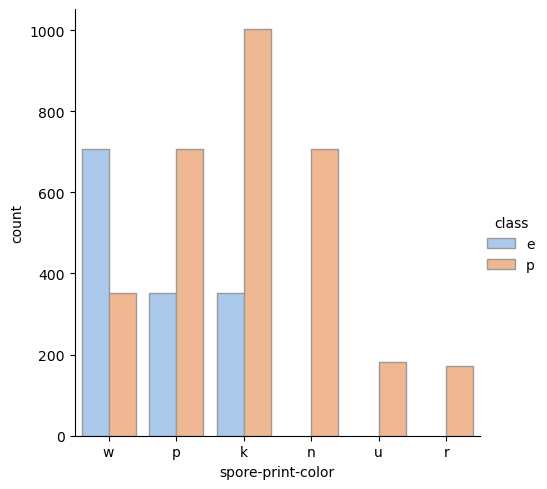

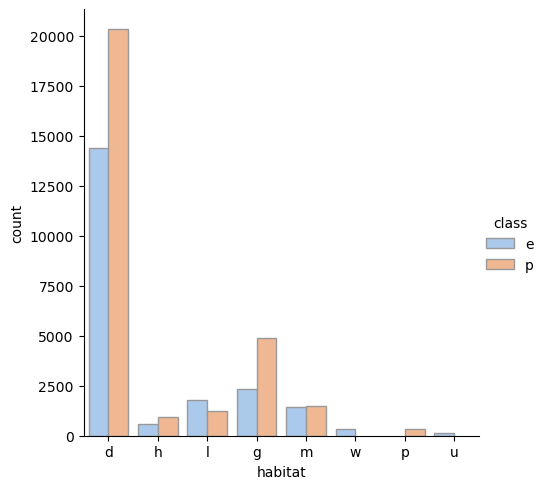

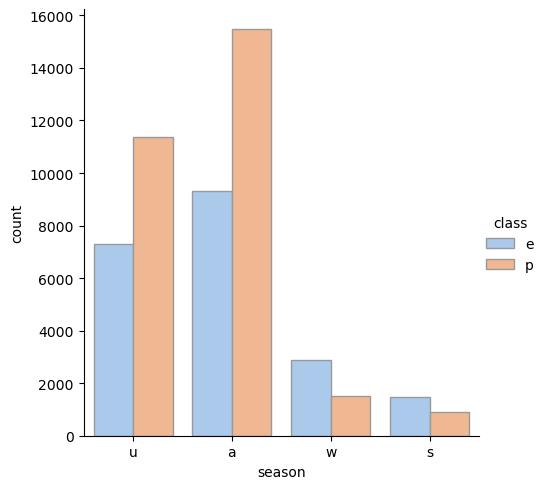

In [9]:
import seaborn as sns

for name in train_df.columns:
    if train_df[name].dtype == 'O':
        sns.catplot(
            data=train_df, x=name, hue="class", kind="count",
            palette="pastel", edgecolor=".6"
        )
        plt.show()


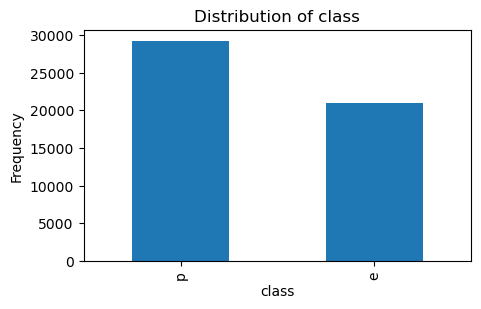

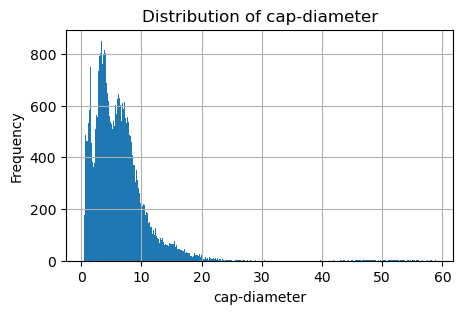

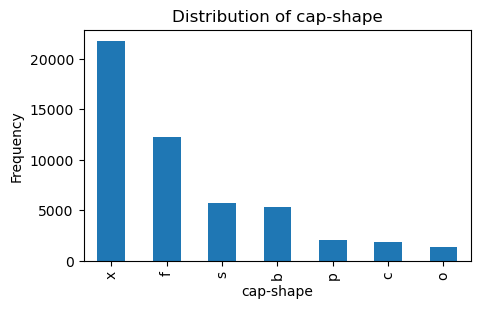

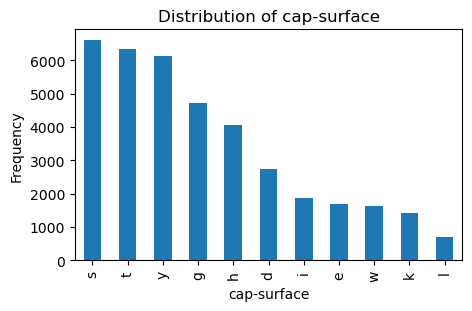

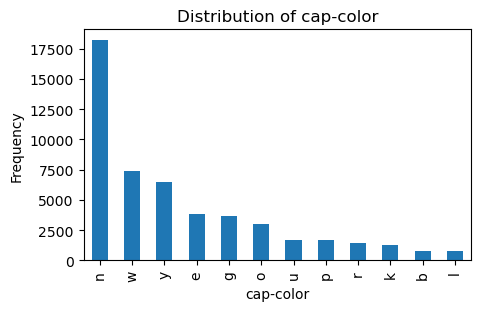

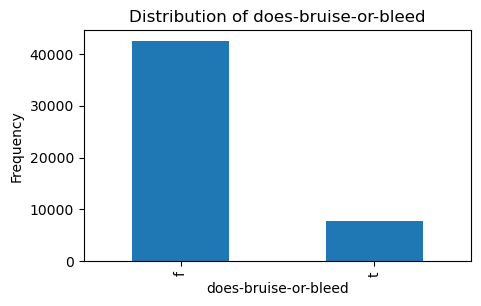

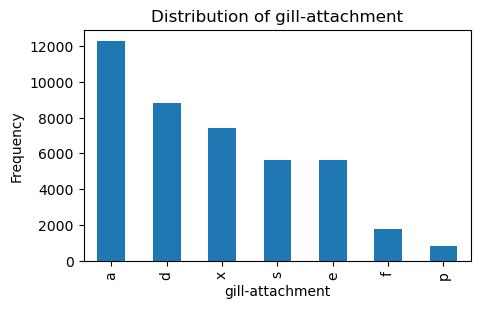

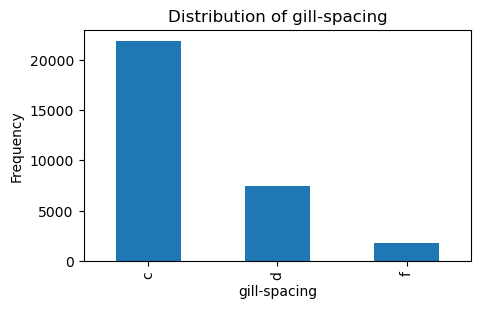

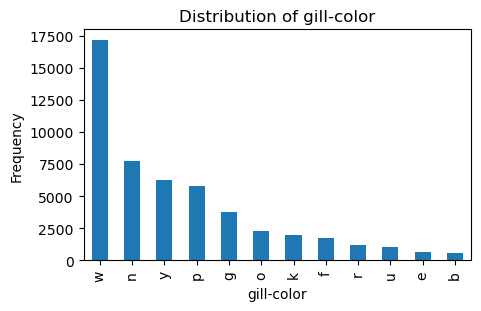

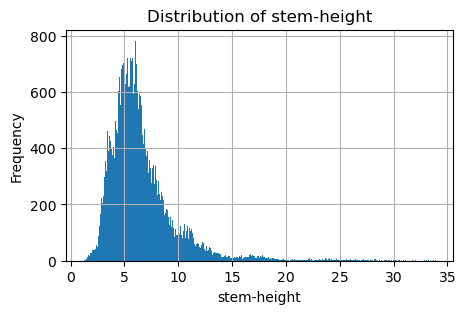

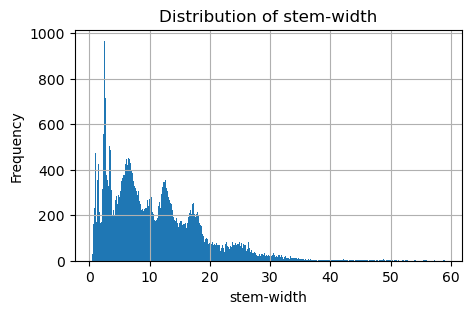

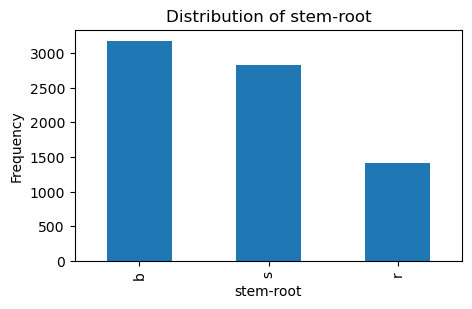

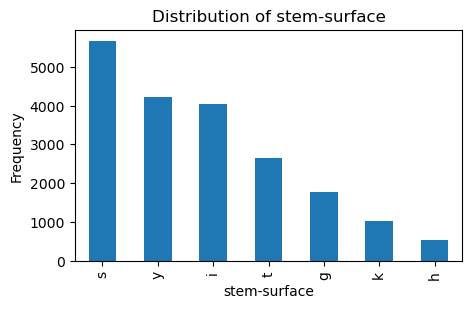

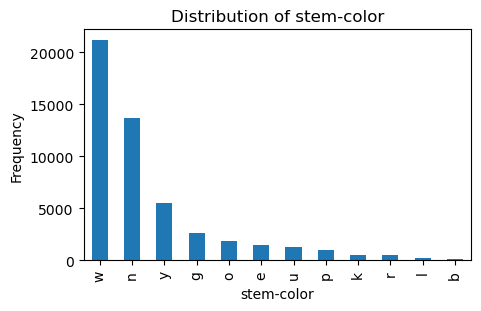

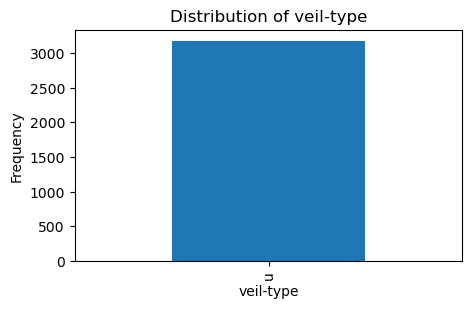

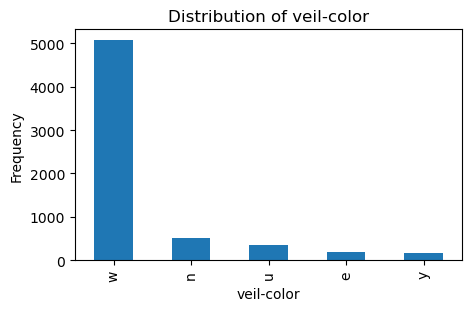

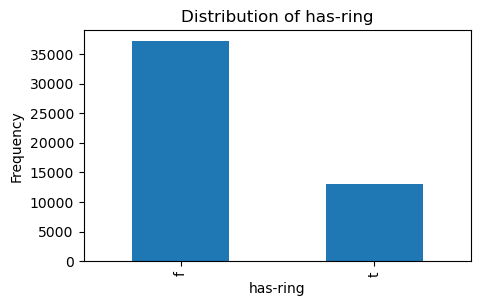

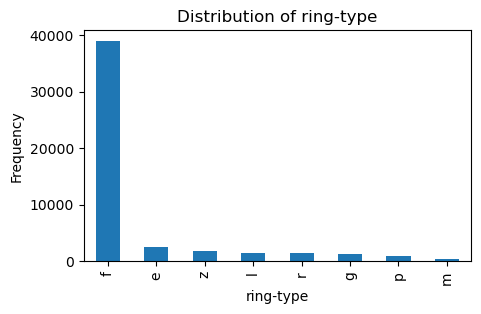

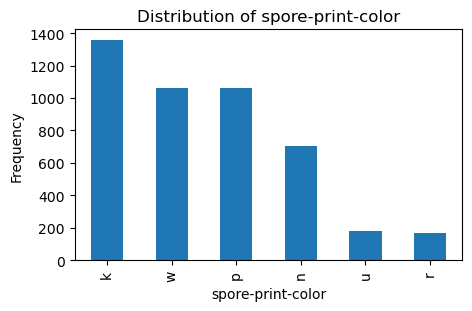

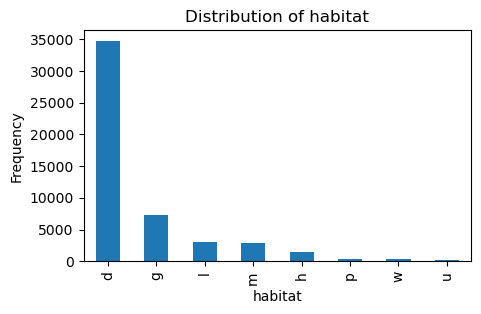

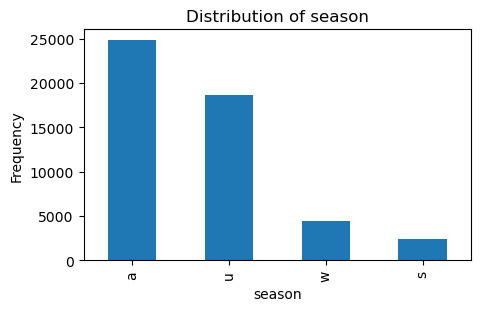

In [10]:
for name in train_df.columns:
    if train_df[name].dtype == 'O':
        train_df[name].value_counts().plot(kind = 'bar',figsize = (5,3))
        plt.xlabel(name)
        plt.ylabel("Frequency")
        plt.title("Distribution of " + name)
        plt.show()
    else:
        train_df[name].hist(bins = 500, figsize = (5,3))
        plt.xlabel(name)
        plt.ylabel("Frequency")
        plt.title("Distribution of " + name)
        plt.show()
        
    

In [11]:
train_df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
dtype: int64

In [12]:
null_features = []
sum_dict = train_df.isnull().sum()
for key in sum_dict.keys():
    if(sum_dict[key] != 0):
        null_features.append(key)

In [13]:
null_features

['cap-surface',
 'gill-attachment',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'ring-type',
 'spore-print-color']

In [14]:
train_df_rep = train_df.fillna('?')
test_df_rep = test_df.fillna('?')
train_features_rep = train_df_rep.drop("class",axis = 1)
test_features_rep = test_df_rep.drop("class",axis = 1)

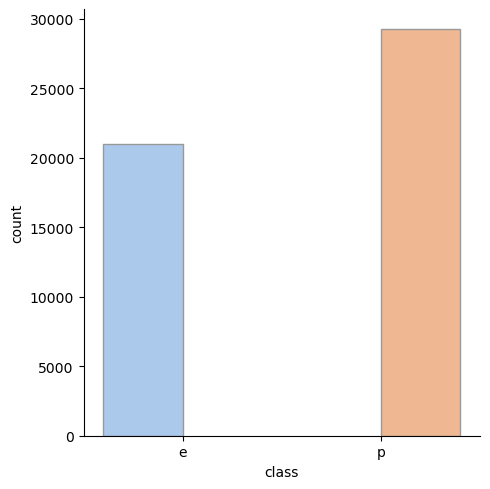

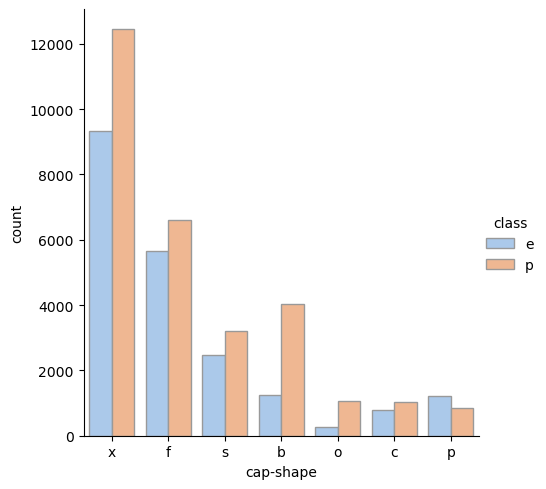

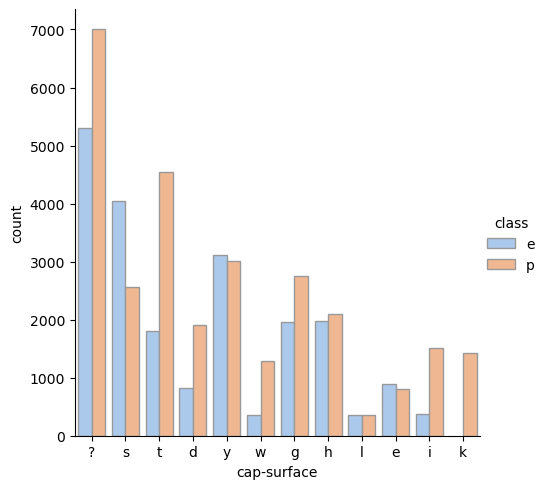

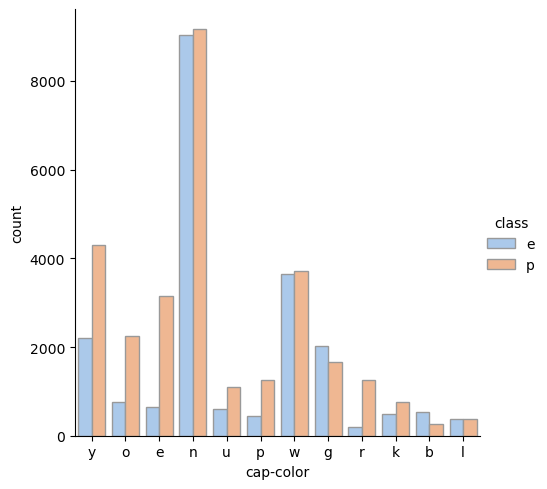

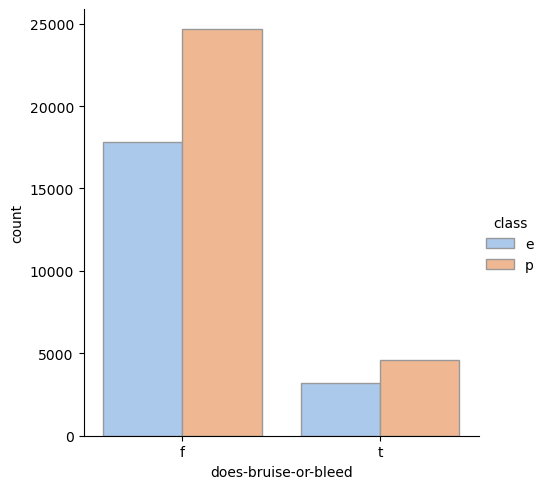

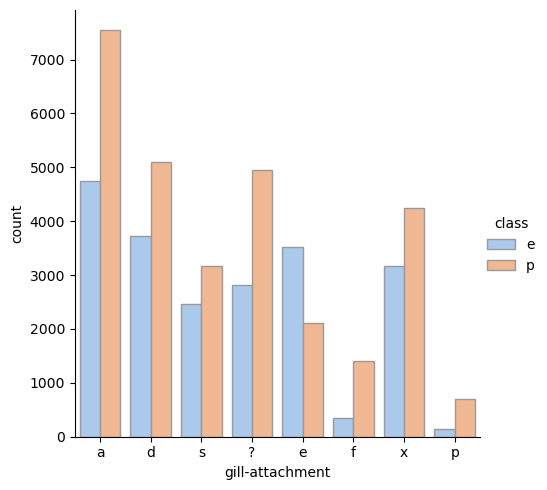

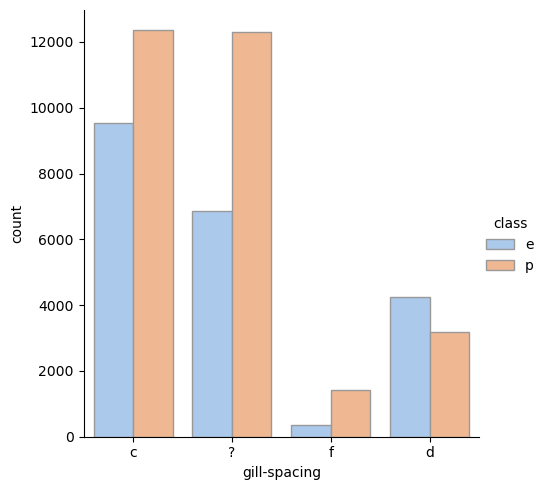

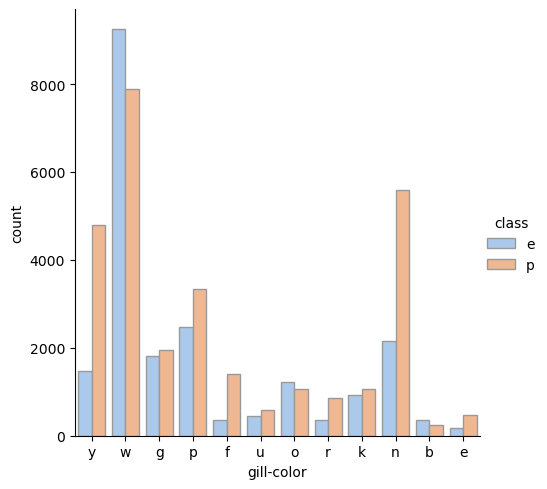

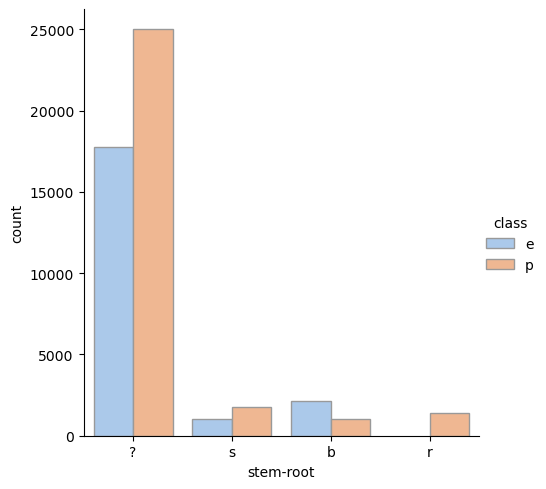

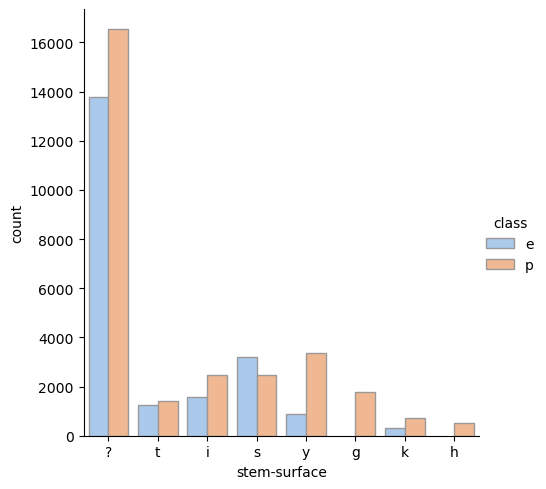

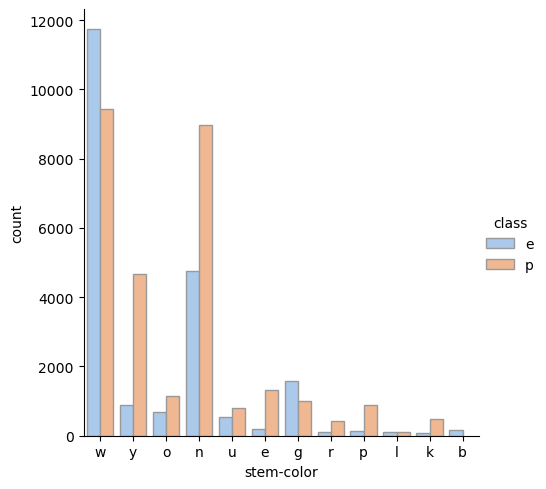

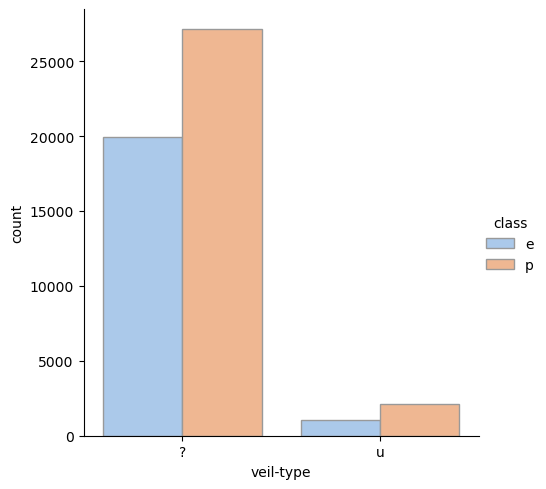

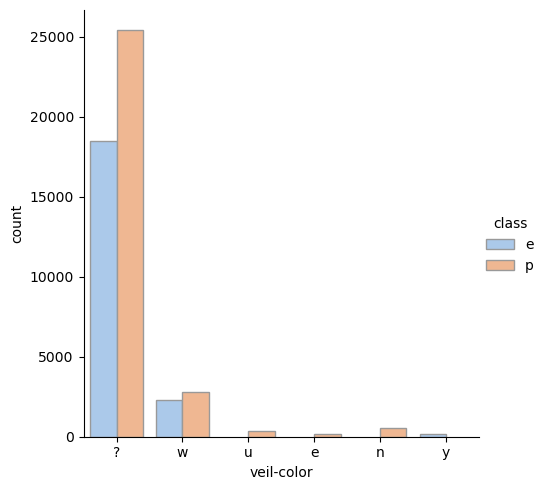

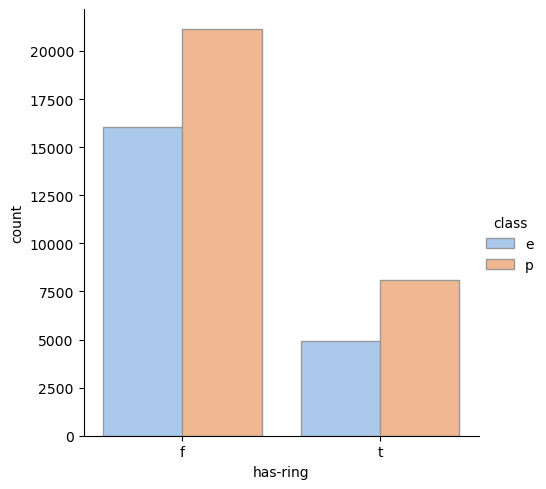

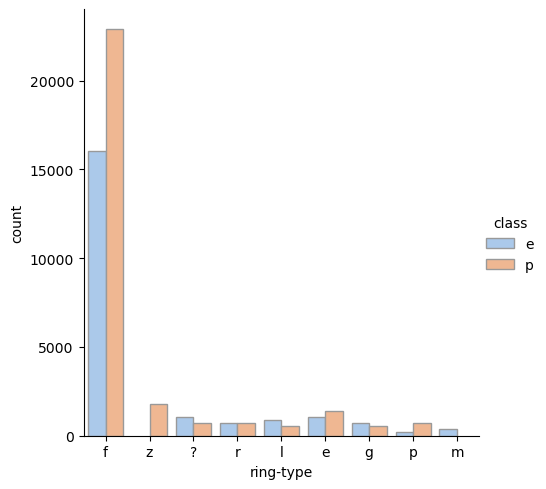

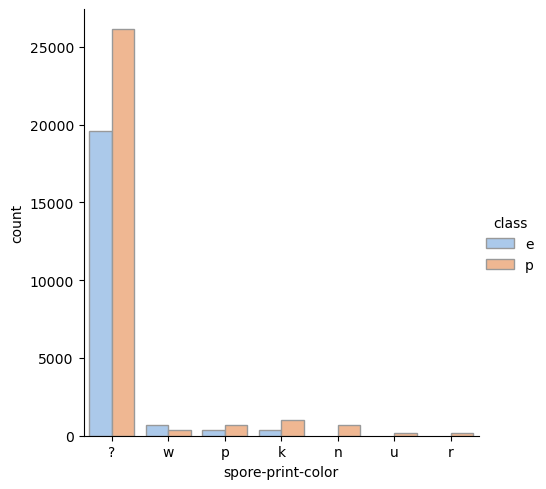

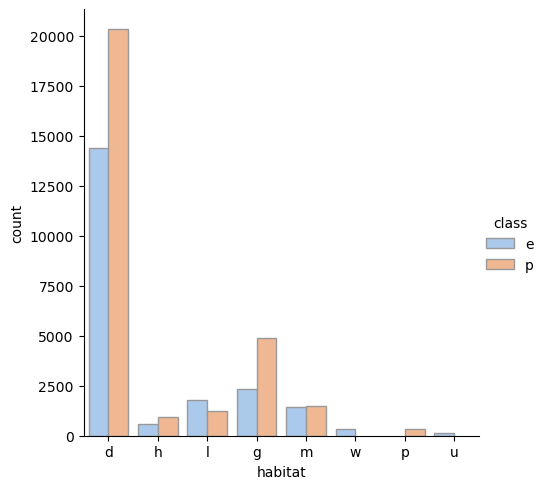

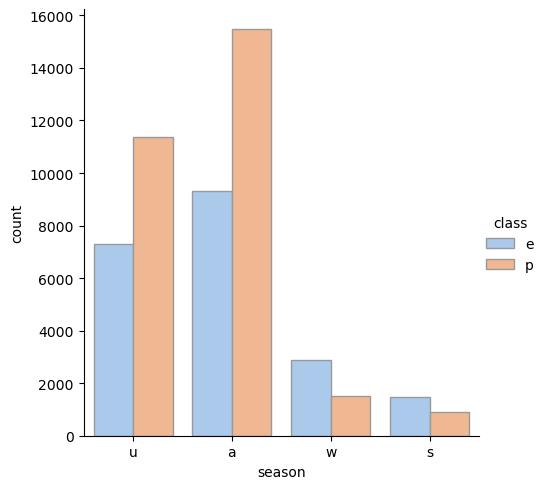

In [15]:
for name in train_df_rep.columns:
    if train_df_rep[name].dtype == 'O':
        sns.catplot(
            data=train_df_rep, x=name, hue="class", kind="count",
            palette="pastel", edgecolor=".6"
        )
        plt.show()

In [16]:
test_df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface              1822
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2118
gill-spacing             5914
gill-color                  0
stem-height                 0
stem-width                  0
stem-root                8738
stem-surface             7823
stem-color                  0
veil-type               10856
veil-color               9740
has-ring                    0
ring-type                 706
spore-print-color        9034
habitat                     0
season                      0
dtype: int64

cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color contains null values. Columns that contain null values should be dropped.

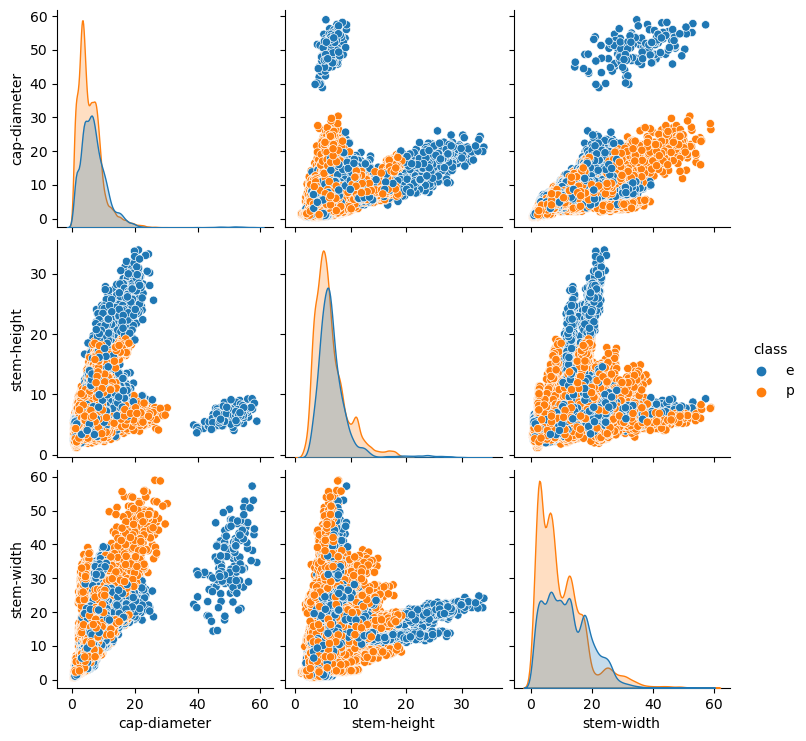

In [17]:
attributes = []
for name in train_df.columns:
    if train_df[name].dtype != 'O':
        attributes.append(name)

attributes.append("class")

sns.pairplot(train_df[attributes], hue="class")
plt.show()

In [18]:
print("Number of edible mushroom is",sum(train_df["class"] == 'e'), "in training set")
print("Number of posionous mushroom is",sum(train_df["class"] == 'p'), "in training set")
print("Number of edible mushroom is",sum(test_df["class"] == 'e')," in test set")
print("Number of posionous mushroom is",sum(test_df["class"] == 'p')," in test set") # no class imbalance

Number of edible mushroom is 20971 in training set
Number of posionous mushroom is 29242 in training set
Number of edible mushroom is 6210  in test set
Number of posionous mushroom is 4646  in test set


In [19]:
train_df.corr()

,cap-diameter,stem-height,stem-width
cap-diameter,1.000000,0.464897,0.778005
stem-height,0.464897,1.000000,0.360779
stem-width,0.778005,0.360779,1.000000


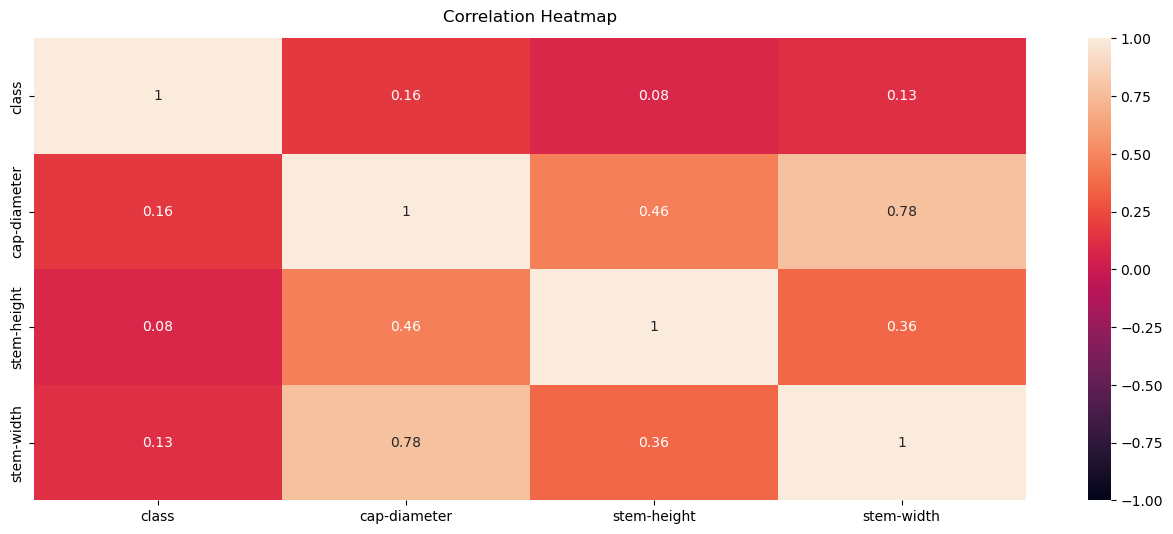

In [20]:
train_df_v2 = train_df.copy()
train_df_v2["class"] = (train_df_v2["class"] == "e")

plt.figure(figsize = (16,6))
h_map = sns.heatmap(train_df_v2.corr(),vmin=-1, vmax=1, annot=True)
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

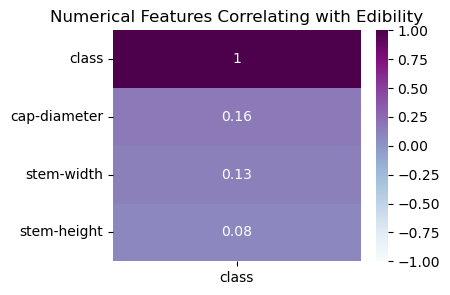

In [21]:
plt.figure(figsize = (4,3))
h_map = sns.heatmap(train_df_v2.corr()[["class"]].sort_values(by = "class",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='BuPu')
h_map.set_title("Numerical Features Correlating with Edibility")
plt.show()

# 4. Data Processing

In [22]:
# Hints:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1 
# 2. You can drop columns if you see fit
# 3. See any imcomplete data? We learned how to deal with them in project 1.

#train_features 
#train_labels 
#test_features
#test_labels

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [23]:
def pipeline_data(train_features,test_features):
    num_attributes = []
    cat_attributes = []
    for name in train_features.columns:
        if train_features[name].dtype == 'O':
            cat_attributes.append(name)
        else:
            num_attributes.append(name)


    num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
    ])

    full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(categories = 'auto', handle_unknown = 'ignore'),cat_attributes)])

    tf_train_features = full_pipeline.fit_transform(train_features)
    tf_test_features = full_pipeline.transform(test_features)

    if(full_pipeline.sparse_output_):
        tf_train_features = tf_train_features.toarray()
        tf_test_features = tf_test_features.toarray()
    
    return tf_train_features,tf_test_features,full_pipeline

In [24]:
train_labels = (train_labels == 'e').astype("int")
test_labels = (test_labels == 'e').astype("int")

In [25]:
drop_set = []
for name in train_features.keys():
    if train_df[name].isnull().sum() != 0:
        drop_set.append(name)
print("Features that contain null values : ",drop_set)

Features that contain null values :  ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']


In [26]:
dropped_train_features = train_features.drop(columns = drop_set)
dropped_test_features = test_features.drop(columns = drop_set)

In [27]:
dropped_train_features.isnull().sum()

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [28]:
dropped_test_features.isnull().sum()

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [29]:
tf_train_features_rep, tf_test_features_rep, full_pipeline_rep = pipeline_data(train_features_rep,test_features_rep)
tf_train_features, tf_test_features, full_pipeline = pipeline_data(dropped_train_features,dropped_test_features)

In [30]:
index_list = []
index = 0
for name in full_pipeline_rep.get_feature_names_out():
    if not("?" in name):
        index_list.append(index)
    index += 1
tf_train_features_no_null = tf_train_features_rep[:,index_list]
tf_test_features_no_null = tf_test_features_rep[:,index_list]

In [31]:
print("Processed training data size: ",tf_train_features.shape)
print("Processed test data size: ",tf_test_features.shape)

print("Processed filled training data size: ",tf_train_features_rep.shape)
print("Processed filled test data size: ",tf_test_features_rep.shape)

print("Processed no ? training data size: ",tf_train_features_no_null.shape)
print("Processed no ? test data size: ",tf_test_features_no_null.shape)

Processed training data size:  (50213, 62)
Processed test data size:  (10856, 62)
Processed filled training data size:  (50213, 122)
Processed filled test data size:  (10856, 122)
Processed no ? training data size:  (50213, 113)
Processed no ? test data size:  (10856, 113)


In [32]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(solver = 'liblinear')
scores = cross_validate(clf, tf_train_features, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'))
scores_rep = cross_validate(clf, tf_train_features_rep, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'))
scores_no_null = cross_validate(clf, tf_train_features_no_null, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'))

In [33]:
print("Dropped Columns:")
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())
print("All features")
print("Average accuracy, " , scores_rep['test_accuracy'].mean())
print("Average precision, " , scores_rep['test_precision'].mean())
print("Average recall, " , scores_rep['test_recall'].mean())
print("Average f1, " , scores_rep['test_f1'].mean())
print("Dropped ?:")
print("Average accuracy, " , scores_no_null['test_accuracy'].mean())
print("Average precision, " , scores_no_null['test_precision'].mean())
print("Average recall, " , scores_no_null['test_recall'].mean())
print("Average f1, " , scores_no_null['test_f1'].mean())

Dropped Columns:
Average accuracy,  0.7419989330356114
Average precision,  0.7023029763572095
Average recall,  0.6635828204348397
Average f1,  0.6823727629718468
All features
Average accuracy,  0.8772031660573976
Average precision,  0.8610036737026052
Average recall,  0.8419722805242225
Average f1,  0.8513587832718971
Dropped ?:
Average accuracy,  0.8765260299414699
Average precision,  0.8600631956689881
Average recall,  0.8413047283035869
Average f1,  0.8505609132666235


# 5. Data Augmentation (Creating at least 2 New Features)

In [34]:
# Similar to Project 1 and 2.
# NEW FEATURE STEM-AREA
aug_train_features_rep = train_features_rep.copy()
aug_test_features_rep = test_features_rep.copy()
aug_train_features_rep["stem-area"] = aug_train_features_rep["stem-width"] *0.1* aug_train_features_rep["stem-height"]
aug_test_features_rep["stem-area"] = aug_test_features_rep["stem-width"] * 0.1 * aug_test_features_rep["stem-height"]

# new feature stem-area and cap-diameter
aug_train_features_rep["stem-cap-size"] = aug_train_features_rep["stem-area"] * aug_train_features_rep["cap-diameter"]
aug_test_features_rep["stem-cap-size"] = aug_test_features_rep["stem-area"] * aug_test_features_rep["cap-diameter"]


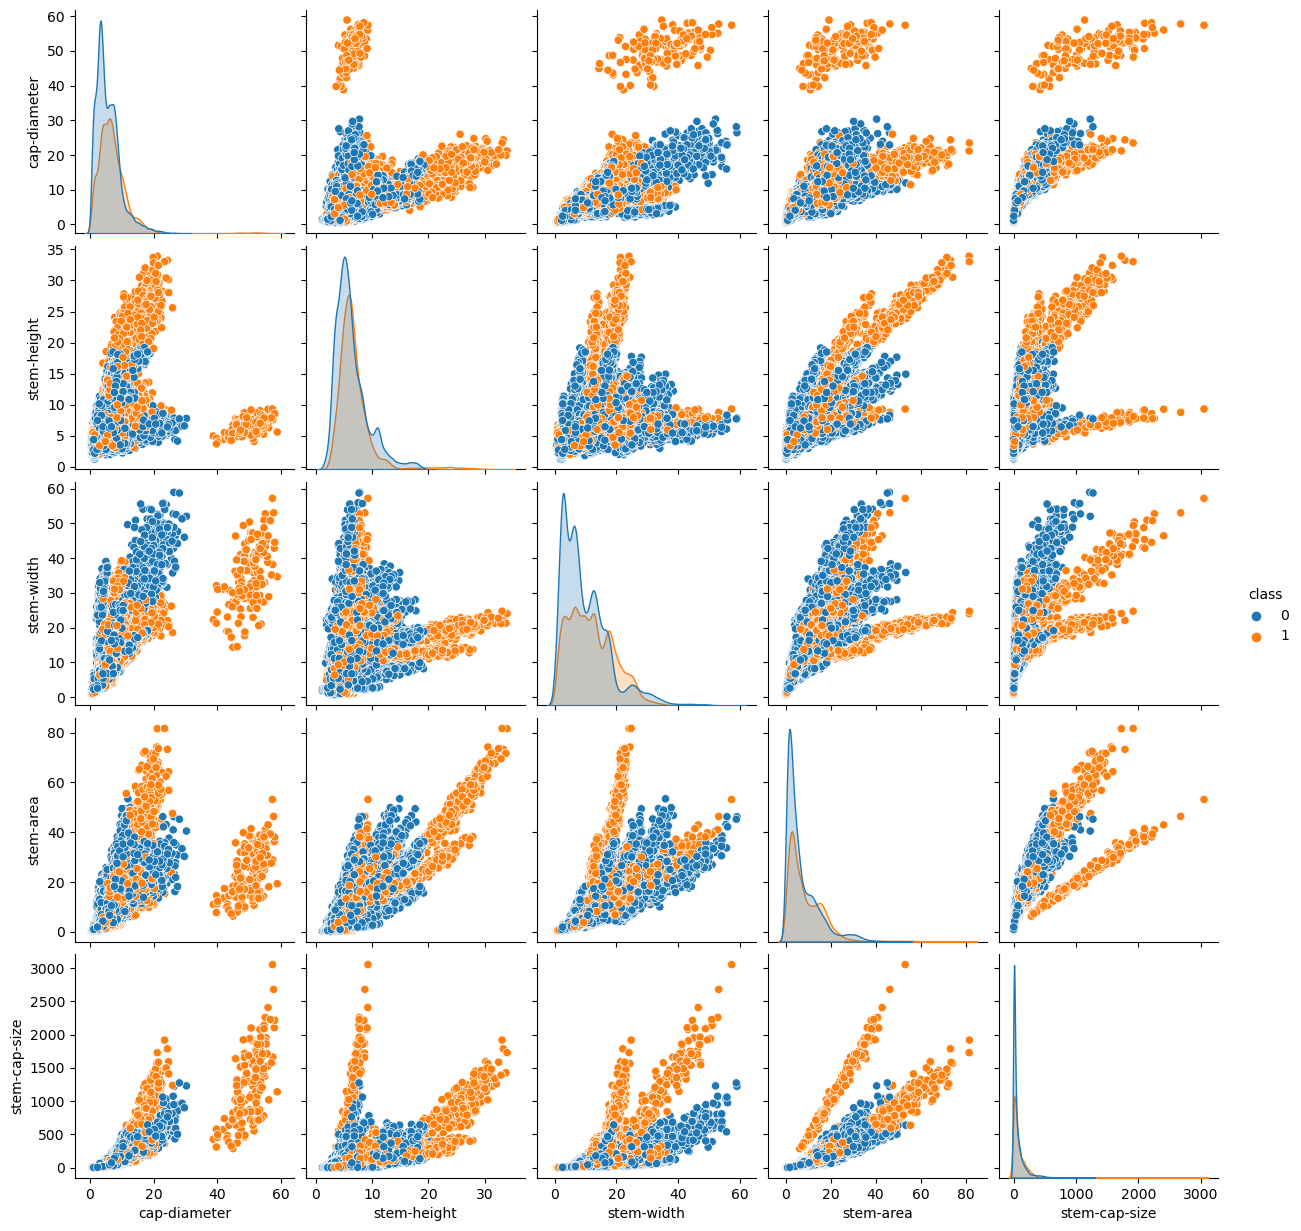

In [35]:
attributes = []
for name in aug_train_features_rep.columns:
    if aug_train_features_rep[name].dtype != 'O':
        attributes.append(name)

to_pairplot = aug_train_features_rep[attributes]
to_pairplot["class"] = train_labels
sns.pairplot(to_pairplot, hue="class")
plt.show()

In [36]:
aug_tf_train_features_rep,aug_tf_test_features_rep, aug_full_pipeline_rep = pipeline_data(aug_train_features_rep,aug_test_features_rep)
index_list = []
index = 0
for name in aug_full_pipeline_rep.get_feature_names_out():
    if not("?" in name):
        index_list.append(index)
    index += 1
    
aug_tf_train_features_no_null = aug_tf_train_features_rep[:,index_list]
aug_tf_test_features_no_null = aug_tf_test_features_rep[:,index_list]
aug_feature_list = aug_full_pipeline_rep.get_feature_names_out()[index_list]

In [37]:
print("Processed augmented training data size: ",aug_tf_train_features_no_null.shape)
print("Processed augmented test data size: ",aug_tf_test_features_no_null.shape)

Processed augmented training data size:  (50213, 115)
Processed augmented test data size:  (10856, 115)


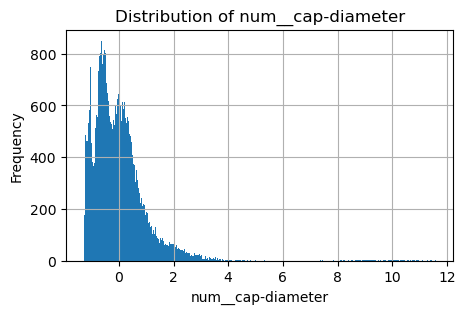

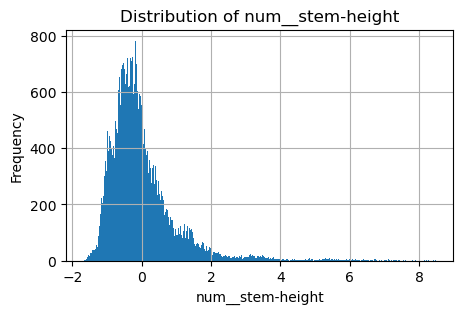

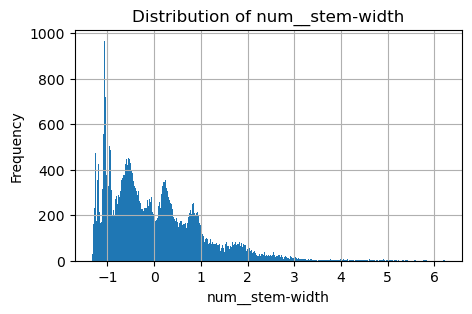

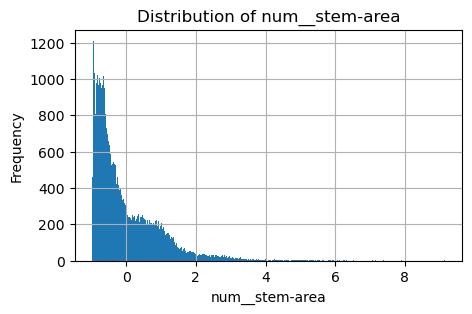

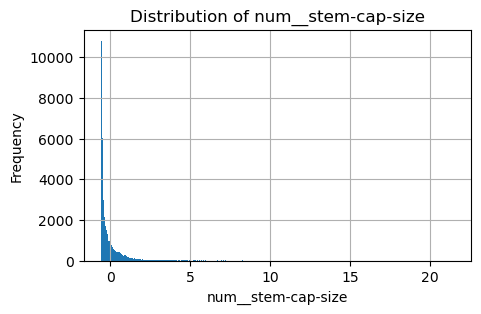

In [38]:
df_aug_train = pd.DataFrame(aug_tf_train_features_no_null,columns=aug_feature_list)
df_aug_test = pd.DataFrame(aug_tf_test_features_no_null,columns=aug_feature_list)
for name in df_aug_train.columns:
    if "num__" in name:
        df_aug_train[name].hist(bins = 500, figsize = (5,3))
        plt.xlabel(name)
        plt.ylabel("Frequency")
        plt.title("Distribution of " + name)
        plt.show()

In [39]:
index = 0
for name in df_aug_train.columns:
    print(index," ",name)
    index += 1

0   num__cap-diameter
1   num__stem-height
2   num__stem-width
3   num__stem-area
4   num__stem-cap-size
5   cat__cap-shape_b
6   cat__cap-shape_c
7   cat__cap-shape_f
8   cat__cap-shape_o
9   cat__cap-shape_p
10   cat__cap-shape_s
11   cat__cap-shape_x
12   cat__cap-surface_d
13   cat__cap-surface_e
14   cat__cap-surface_g
15   cat__cap-surface_h
16   cat__cap-surface_i
17   cat__cap-surface_k
18   cat__cap-surface_l
19   cat__cap-surface_s
20   cat__cap-surface_t
21   cat__cap-surface_w
22   cat__cap-surface_y
23   cat__cap-color_b
24   cat__cap-color_e
25   cat__cap-color_g
26   cat__cap-color_k
27   cat__cap-color_l
28   cat__cap-color_n
29   cat__cap-color_o
30   cat__cap-color_p
31   cat__cap-color_r
32   cat__cap-color_u
33   cat__cap-color_w
34   cat__cap-color_y
35   cat__does-bruise-or-bleed_f
36   cat__does-bruise-or-bleed_t
37   cat__gill-attachment_a
38   cat__gill-attachment_d
39   cat__gill-attachment_e
40   cat__gill-attachment_f
41   cat__gill-attachment_p
42   cat__gi

In [40]:
#discard_list = [35,36,81,87,88,111,112,113,114]
discard_list = []
train_data = np.array(df_aug_train.drop(columns = df_aug_train.columns[discard_list]))
test_data = np.array(df_aug_test.drop(columns = df_aug_test.columns[discard_list]))

In [41]:
print(train_data.shape)
print(test_data.shape)

(50213, 115)
(10856, 115)


# 6. Logistic Regression and Hypothesis Testing

In [42]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
select = False
if select:
    min_features_to_select = 1  # Minimum number of features to consider
    clf = LogisticRegression(penalty = 'l1', C = 0.01, solver = "liblinear" )
    cv = StratifiedKFold(5)

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="f1",
        min_features_to_select=min_features_to_select,
        n_jobs=-1,
        verbose = 100
    )
    rfecv.fit(train_data, train_labels)



In [43]:
if select:
    print(f"Optimal number of features: {rfecv.n_features_}")
    print("Feature ranking: ", rfecv.ranking_)

In [44]:
select = False
if select:
    selected_train_data = train_data[:,rfecv.support_]
    selected_test_data = test_data[:,rfecv.support_]
else:
    selected_train_data = train_data.copy()
    selected_test_data = test_data.copy()
with open('selected.npy', 'wb') as f:
    np.save(f, selected_train_data)
    np.save(f, selected_test_data)

In [45]:
with open('selected.npy', 'rb') as f:
    selected_train_data = np.load(f)
    selected_test_data = np.load(f)

LogisticRegression(solver='liblinear')
Accuracy with transformed data:  0.8884750960906538
Precision with transformed data:  0.8770174147657591
Recall with transformed data:  0.8525106098898478
F1 score with transformed data:  0.8645903859174001


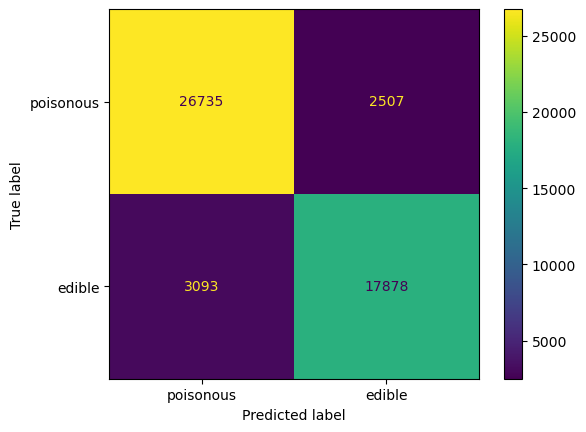

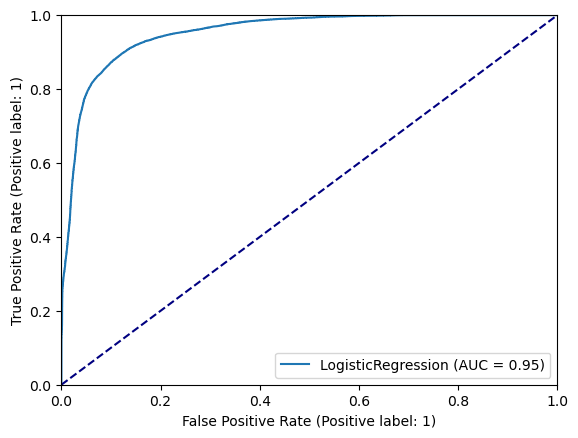

In [46]:
report_classifier_performance(clf,selected_train_data,selected_train_data,train_labels,train_labels)

In [47]:
import statsmodels.api as sm

from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

y_train = train_labels.copy()
x_train = selected_train_data.copy()[:,:15]

x_train_c = sm.add_constant(x_train)
res = GLM(
    y_train,
    x_train_c,
    family=families.Binomial(),
    ).fit(attach_wls=True,maxiter  = 1000)


In [48]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                50213
Model:                            GLM   Df Residuals:                    50198
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32589.
Date:                Tue, 21 Feb 2023   Deviance:                       65178.
Time:                        22:44:26   Pearson chi2:                 5.01e+04
No. Iterations:                  1000   Pseudo R-squ. (CS):            0.05918
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4696      0.015    -30.413      0.0

# 7. Dimensionality Reduction using PCA



In [49]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
dim_red_pca = PCA(n_components = 50, random_state = 42)
pca_train_features = dim_red_pca.fit_transform(selected_train_data)
pca_test_features = dim_red_pca.transform(selected_test_data)

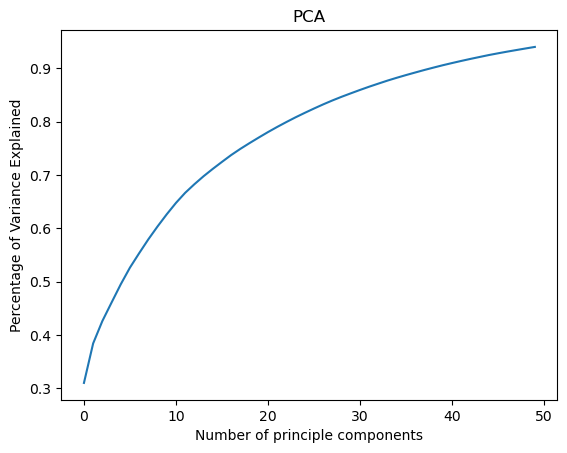

In [50]:
percentage_of_variance = np.cumsum(np.sort(dim_red_pca.explained_variance_ratio_)[::-1])
plt.plot(percentage_of_variance)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Number of principle components")
plt.title("PCA")
plt.show()

# 8. Experiment with any 2 other models (Non-Ensemble)

In [51]:
svm = SVC(kernel = "rbf")
scores = cross_validate(svm, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(svm)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   48.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.5s finished


SVC()
Average accuracy,  1.0
Average precision,  1.0
Average recall,  1.0
Average f1,  1.0


In [52]:
log_reg = LogisticRegression(penalty = "l1", solver = "liblinear" )
scores = cross_validate(log_reg, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(log_reg)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   21.0s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.6s finished


LogisticRegression(penalty='l1', solver='liblinear')
Average accuracy,  0.8918605853820962
Average precision,  0.8797562942581578
Average recall,  0.8584709965164272
Average f1,  0.8689619382188193


In [53]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
scores = cross_validate(clf_tree, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(clf_tree)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


DecisionTreeClassifier()
Average accuracy,  0.9993228876789964
Average precision,  0.9992847603902637
Average recall,  0.9990939664589616
Average f1,  0.9991891814476951


# 9. Experiment with 1 Ensemble Method

In [54]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(random_state= 42)
scores = cross_validate(clf_random_forest, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(clf_random_forest)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    9.4s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.6s finished


RandomForestClassifier(random_state=42)
Average accuracy,  0.9999800836486756
Average precision,  0.9999523355576739
Average recall,  1.0
Average f1,  0.9999761620977354


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(clf_gb, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(clf_gb)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   48.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.0s finished


GradientBoostingClassifier(random_state=42)
Average accuracy,  0.9472445636728766
Average precision,  0.9428335573540858
Average recall,  0.9301417931922357
Average f1,  0.9364181130299158


In [56]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = AdaBoostClassifier(random_state=42)
scores = cross_validate(clf_ab, selected_train_data, train_labels, cv= 10, scoring=('accuracy','precision', 'recall','f1'),n_jobs = -1,verbose = 1)
print(clf_ab)
print("Average accuracy, " , scores['test_accuracy'].mean())
print("Average precision, " , scores['test_precision'].mean())
print("Average recall, " , scores['test_recall'].mean())
print("Average f1, " , scores['test_f1'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   12.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished


AdaBoostClassifier(random_state=42)
Average accuracy,  0.8349630159463268
Average precision,  0.8011544890461046
Average recall,  0.8046344294109383
Average f1,  0.8028209259631545


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [57]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html
with open('data.npy', 'wb') as f:
    np.save(f, selected_train_data)
    np.save(f, selected_test_data)
    np.save(f, train_labels)
    np.save(f, test_labels)

In [58]:
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
with open('data.npy', 'rb') as f:
    selected_train_data = np.load(f)
    selected_test_data = np.load(f)
    train_labels = np.load(f)
    test_labels = np.load(f)
train_data = selected_train_data.copy()
test_data  = selected_test_data.copy()

In [59]:
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = RandomForestClassifier(random_state=42)

In [60]:

#Decision Tree
param1 = {}
param1['classifier__criterion'] = ["gini","entropy"]
param1['classifier__splitter'] = ["best","random"]
param1['classifier__max_depth'] = [3,5,10,15,20]
param1['classifier__min_samples_split'] = [2,5,7,10]
param1['classifier__min_samples_leaf'] = [5,20]
param1['classifier__max_leaf_nodes'] = [5,10,100]
param1['classifier__min_impurity_decrease'] = [0.001,0.01]
#param1['classifier__class_weight'] = ["balanced","balanced_subsample",None]
param1['classifier__ccp_alpha'] = [0.001,0.01]
param1['classifier'] = [clf1]

#Logistic Regression
param2 = {}
param2['classifier__penalty'] = ['l1','l2']
param2['classifier__C'] = [1e-3,1e-2,1e-1,1e-0,1e1,1e2,1e3]
param2['classifier__max_iter'] = [100000]
param2['classifier__solver'] = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
param2['classifier'] = [clf2]

#Random Forest

param3 = {}
param3['classifier__n_estimators'] = [100]
param3['classifier__criterion'] = ["gini","entropy"]
param3['classifier__max_depth'] = [3,5,10,15,20]
param3['classifier__min_samples_split'] = [2,5,7,10]
param3['classifier__min_samples_leaf'] = [5,20]
#param3['classifier__max_features'] = ["sqrt","log2",None]
param3['classifier__max_leaf_nodes'] = [5,10,100]
param3['classifier__min_impurity_decrease'] = [0.001,0.01]
param3['classifier__n_jobs'] = [-1]
param3['classifier__warm_start'] = [True,False]
#param3['classifier__class_weight'] = ["balanced","balanced_subsample",None]
param1['classifier__ccp_alpha'] = [0.001,0.01]
param3['classifier'] = [clf3]


In [61]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import joblib

In [62]:

kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf1)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param1, scoring='f1',verbose=10)
grid_search.fit(train_data, train_labels)

#save your model or results
joblib.dump(grid_search, 'tree.pkl')

#load your model for further usage
joblib.load("tree.pkl")


Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(ccp_alpha=0.001,
                                                               criterion='entropy',
                                                               max_depth=20,
                                                               max_leaf_nodes=100,
                                                               min_impurity_decrease=0.001,
                                                               min_samples_leaf=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier': [DecisionTreeClassifier(ccp_alpha=0.001,
                                                               criterion='en...
                         'classifier__ccp_alpha': [0.001, 0.01],
                         'classifier__criterion

In [63]:
#Logistic

kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf2)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param2, scoring='f1',verbose=10)
grid_search.fit(train_data, train_labels)

#save your model or results
joblib.dump(grid_search, 'logistic.pkl')

#load your model for further usage
joblib.load("logistic.pkl")

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(C=1000.0,
                                                           max_iter=100000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(C=1000.0,
                                                           max_iter=100000,
                                                           random_state=42,
                                                           solver='liblinear')],
                         'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                           1000.0],
                         'classifier__max_iter': [100000],
                         'classifier__penalty': ['l1', 'l2'

In [64]:

kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf3)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param3, scoring='f1',verbose=10)
grid_search.fit(train_data, train_labels)

#save your model or results
joblib.dump(grid_search, 'forest.pkl')

#load your model for further usage
joblib.load("forest.pkl")


Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_depth=20,
                                                               max_leaf_nodes=100,
                                                               min_impurity_decrease=0.001,
                                                               min_samples_leaf=20,
                                                               n_jobs=-1,
                                                               random_state=42,
                                                               warm_start=True))]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier(criterion='entropy...
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max

# 11. Report Final Results 

In [65]:
# e.g. Accuracy, Precision etc.

Decision Tree with best param  {'classifier': DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_leaf_nodes=100, min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=42), 'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__max_leaf_nodes': 100, 'classifier__min_impurity_decrease': 0.001, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Best validation score:  0.9899072609584103
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_leaf_nodes=100, min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=42)
Accuracy with transformed data:  0.9913568199470256
Precision with transformed data:  0.9962785752259437
Recall with transformed data:  0.9829764913451909
F1 score with transformed data:  0.989582833277327


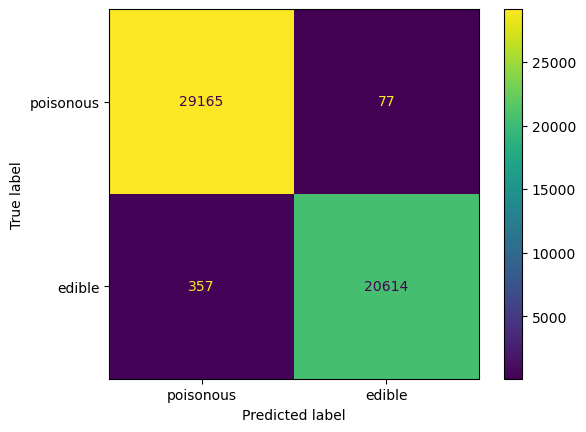

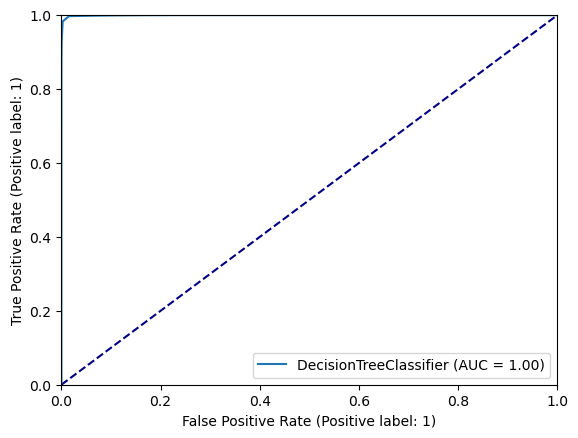

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_leaf_nodes=100, min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=42)
Accuracy with transformed data:  0.5306742815033162
Precision with transformed data:  0.7073261435477873
Recall with transformed data:  0.30628019323671496
F1 score with transformed data:  0.42746375997303065


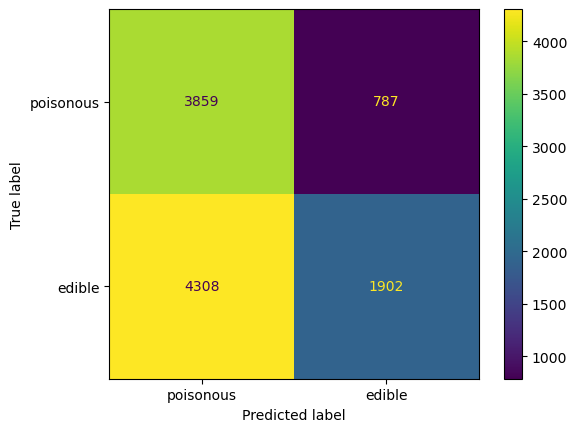

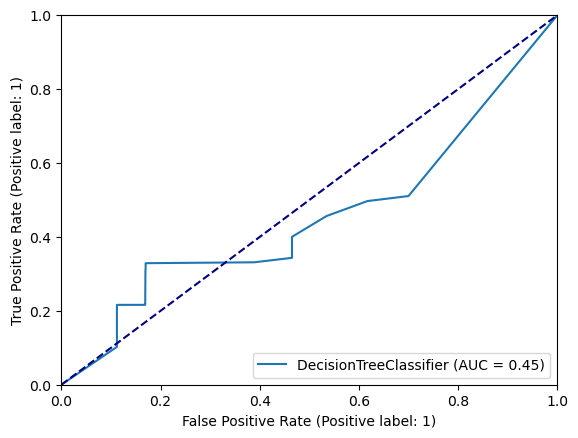

In [66]:
#Tree best performance
gs = joblib.load("tree.pkl")
print("Decision Tree with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)


Logistic Regression with best param  {'classifier': LogisticRegression(C=1000.0, max_iter=100000, random_state=42,
                   solver='liblinear'), 'classifier__C': 1000.0, 'classifier__max_iter': 100000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best validation score:  0.8702077774540855
LogisticRegression(C=1000.0, max_iter=100000, random_state=42,
                   solver='liblinear')
Accuracy with transformed data:  0.893732698703523
Precision with transformed data:  0.8815834431590764
Recall with transformed data:  0.8612369462591197
F1 score with transformed data:  0.8712914274687635


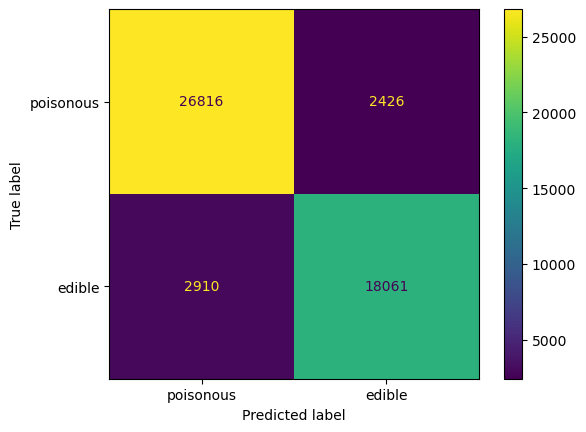

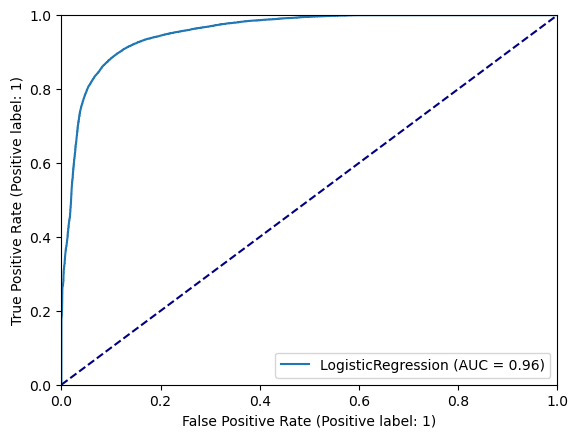

LogisticRegression(C=1000.0, max_iter=100000, random_state=42,
                   solver='liblinear')
Accuracy with transformed data:  0.41184598378776716
Precision with transformed data:  0.4734284846644397
Recall with transformed data:  0.25104669887278586
F1 score with transformed data:  0.3281069136062296


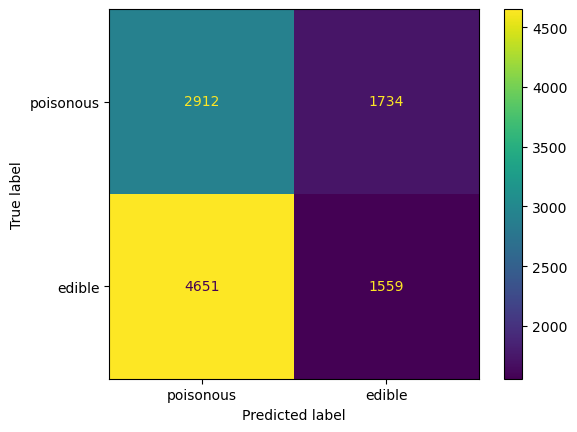

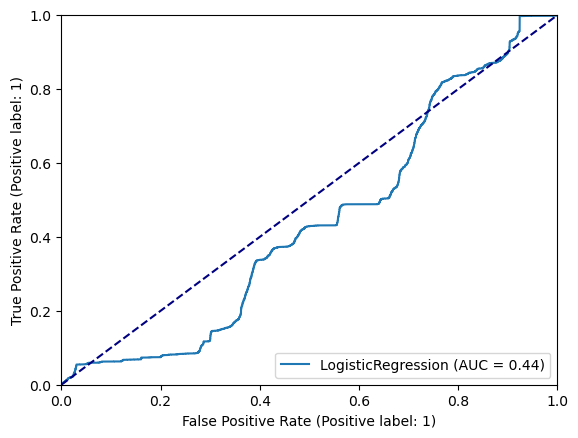

In [67]:
#Tree best performance
gs = joblib.load("logistic.pkl")
print("Logistic Regression with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)

Random Forest with best param  {'classifier': RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=100,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       n_jobs=-1, random_state=42, warm_start=True), 'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__max_leaf_nodes': 100, 'classifier__min_impurity_decrease': 0.001, 'classifier__min_samples_leaf': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__n_jobs': -1, 'classifier__warm_start': True}
Best validation score:  0.9945308061458794
RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=100,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       n_jobs=-1, random_state=42, warm_start=True)
Accuracy with transformed data:  0.9956186644892757
Precision with transformed data:  0.9947074810470605
Recall with transformed data:  0.994802346096991
F1 score wi

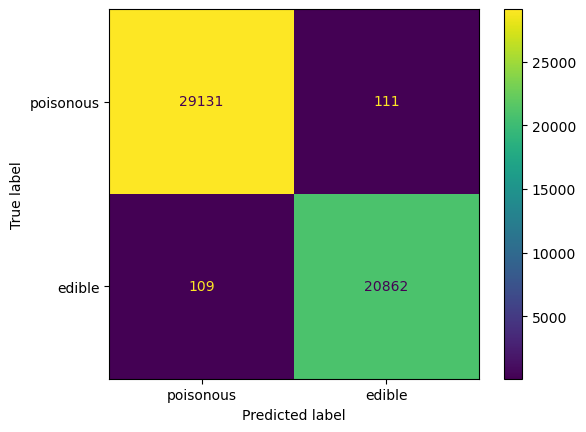

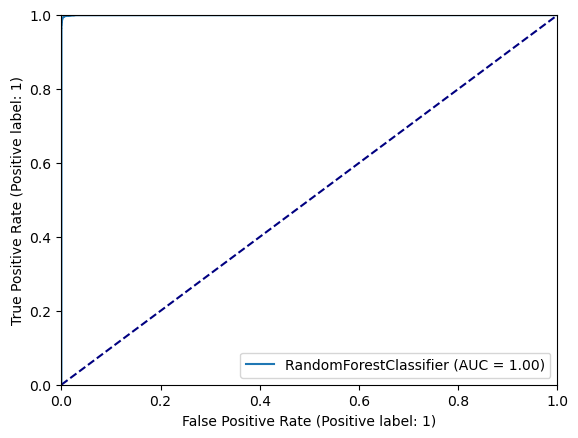

RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=100,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       n_jobs=-1, random_state=42, warm_start=True)
Accuracy with transformed data:  0.604274134119381
Precision with transformed data:  0.8902936378466558
Recall with transformed data:  0.35152979066022544
F1 score with transformed data:  0.5040406372662203


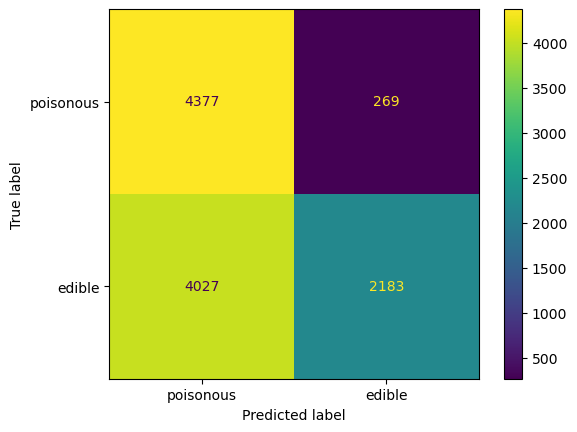

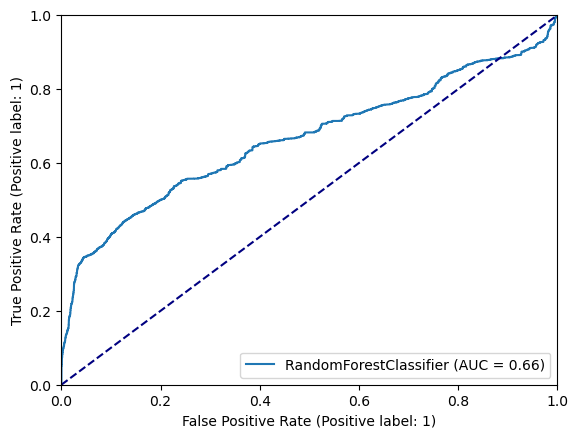

In [68]:
#Tree best performance
gs = joblib.load("forest.pkl")
print("Random Forest with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)